In [74]:
# importing required libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn import set_config
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import warnings

warnings.filterwarnings('ignore')


In [2]:
df=pd.read_excel('cancer patient data sets.xlsx')

In [3]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
# df.columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [6]:
# Alcohol = It is carcogenic
# dust_allergy= usually asthama is associated with higher risk of lung cancer
# Occupational_hazards= inhaling of coal from household
# genetic Risk= about 8% of chance to run it within the family
# Chronic_Lung=chronic obstructive pulmonary disease (COPD) has chance to develop lung cancer. Smokers are vulnerable to COPD
# Balanced _Diet= little evidence that plant based food can avoid cancer
# Obesity= Obesity play a role in lung cancer
# Smoking=YES
# Passive_Smoker= Yes (each year increases the risk by 20-30%)
# chest_pain= When patient undergoes diagonosis for lung cancer he experiences chest pain and respiratory disorders
# Coughing_of_blood= One of the common symptoms of lung cancer
# Fatigue= One of the common symptom 
# Weight_loss= During diagnosis patients experience loss of apetite and lose weight
# Shortness_of breath= yes common(dyspnea)
# Wheezing=Experienced usually in the last stage
# Swallowing_difficulty= yes refered as dysphagia 
# Clubbing_of_finger nails=Indicates lung disease
# Snoring=Yes

In [7]:
# df.columns

In [8]:
#Adding dash between the spaces in Column names

df.columns=[x.replace(' ','_') for x in df.columns]

In [9]:
df.columns

Index(['Patient_Id', 'Age', 'Gender', 'Air_Pollution', 'Alcohol_use',
       'Dust_Allergy', 'OccuPational_Hazards', 'Genetic_Risk',
       'chronic_Lung_Disease', 'Balanced_Diet', 'Obesity', 'Smoking',
       'Passive_Smoker', 'Chest_Pain', 'Coughing_of_Blood', 'Fatigue',
       'Weight_Loss', 'Shortness_of_Breath', 'Wheezing',
       'Swallowing_Difficulty', 'Clubbing_of_Finger_Nails', 'Frequent_Cold',
       'Dry_Cough', 'Snoring', 'Level'],
      dtype='object')

In [10]:
df.describe()

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [11]:
df['Smoking'].max()

8

In [12]:
# Checking out the null values in the data
df.isnull().sum()

Patient_Id                  0
Age                         0
Gender                      0
Air_Pollution               0
Alcohol_use                 0
Dust_Allergy                0
OccuPational_Hazards        0
Genetic_Risk                0
chronic_Lung_Disease        0
Balanced_Diet               0
Obesity                     0
Smoking                     0
Passive_Smoker              0
Chest_Pain                  0
Coughing_of_Blood           0
Fatigue                     0
Weight_Loss                 0
Shortness_of_Breath         0
Wheezing                    0
Swallowing_Difficulty       0
Clubbing_of_Finger_Nails    0
Frequent_Cold               0
Dry_Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [13]:
df.drop(columns='Patient_Id',inplace=True)

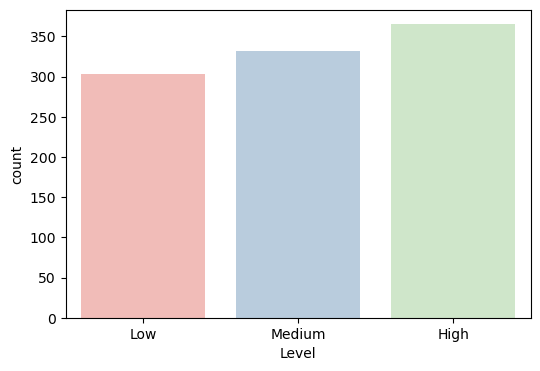

In [14]:
# Value Counts
plt.figure(figsize=(6,4))
palatte=sns.color_palette("husl")
palette = sns.color_palette('Pastel1')
sns.countplot(x=df['Level'],palette=palette);


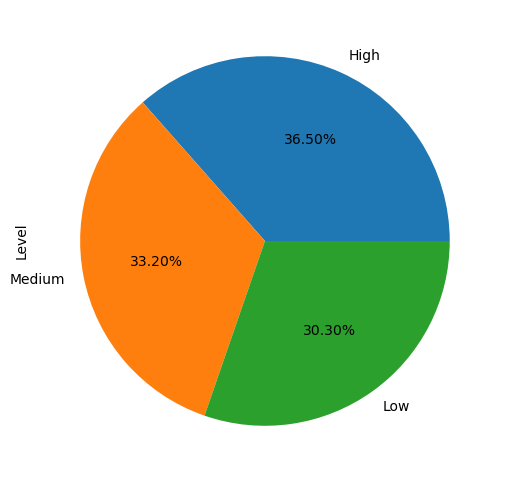

In [15]:
plt.figure()
df['Level'].value_counts().plot.pie(figsize=(10,6),autopct='%1.2f%%')
plt.show()

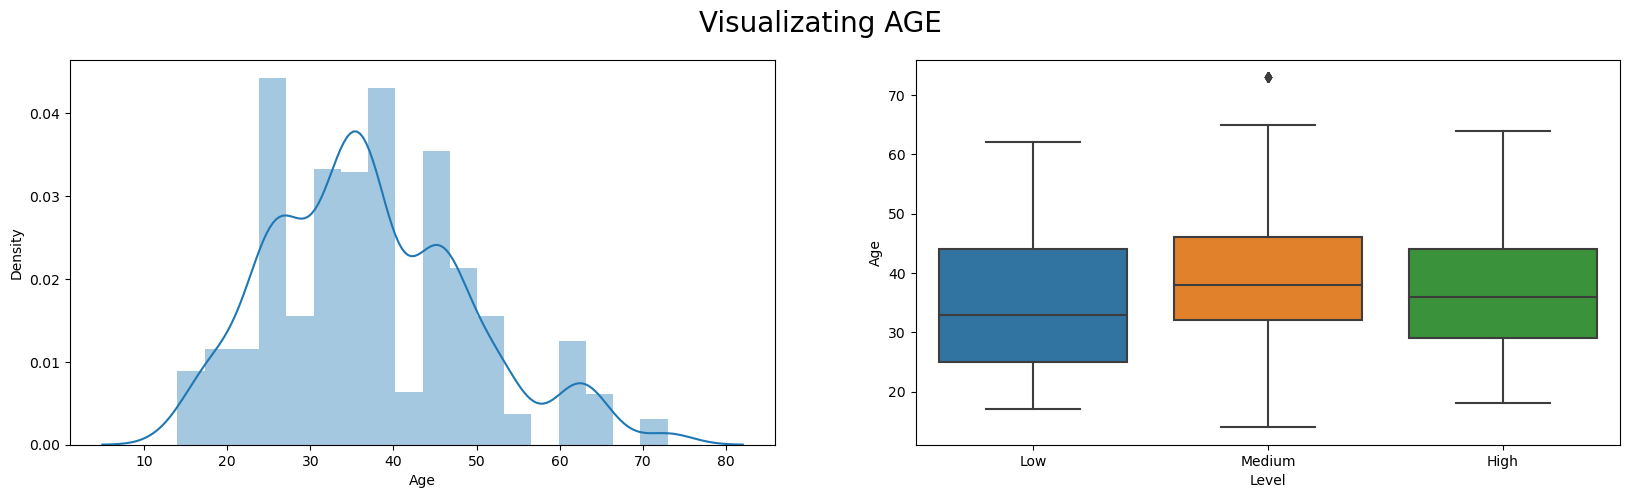

In [16]:
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(df['Age'],ax=ax[0])
sns.boxplot(x=df['Level'],y=df['Age'],ax=ax[1])
plt.suptitle("Visualizating AGE",size=20);

In [17]:
# Replacing High medium and low


df.replace({'Low':1,'Medium':2,'High':3},inplace=True)
df

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,...,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,3
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,3
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


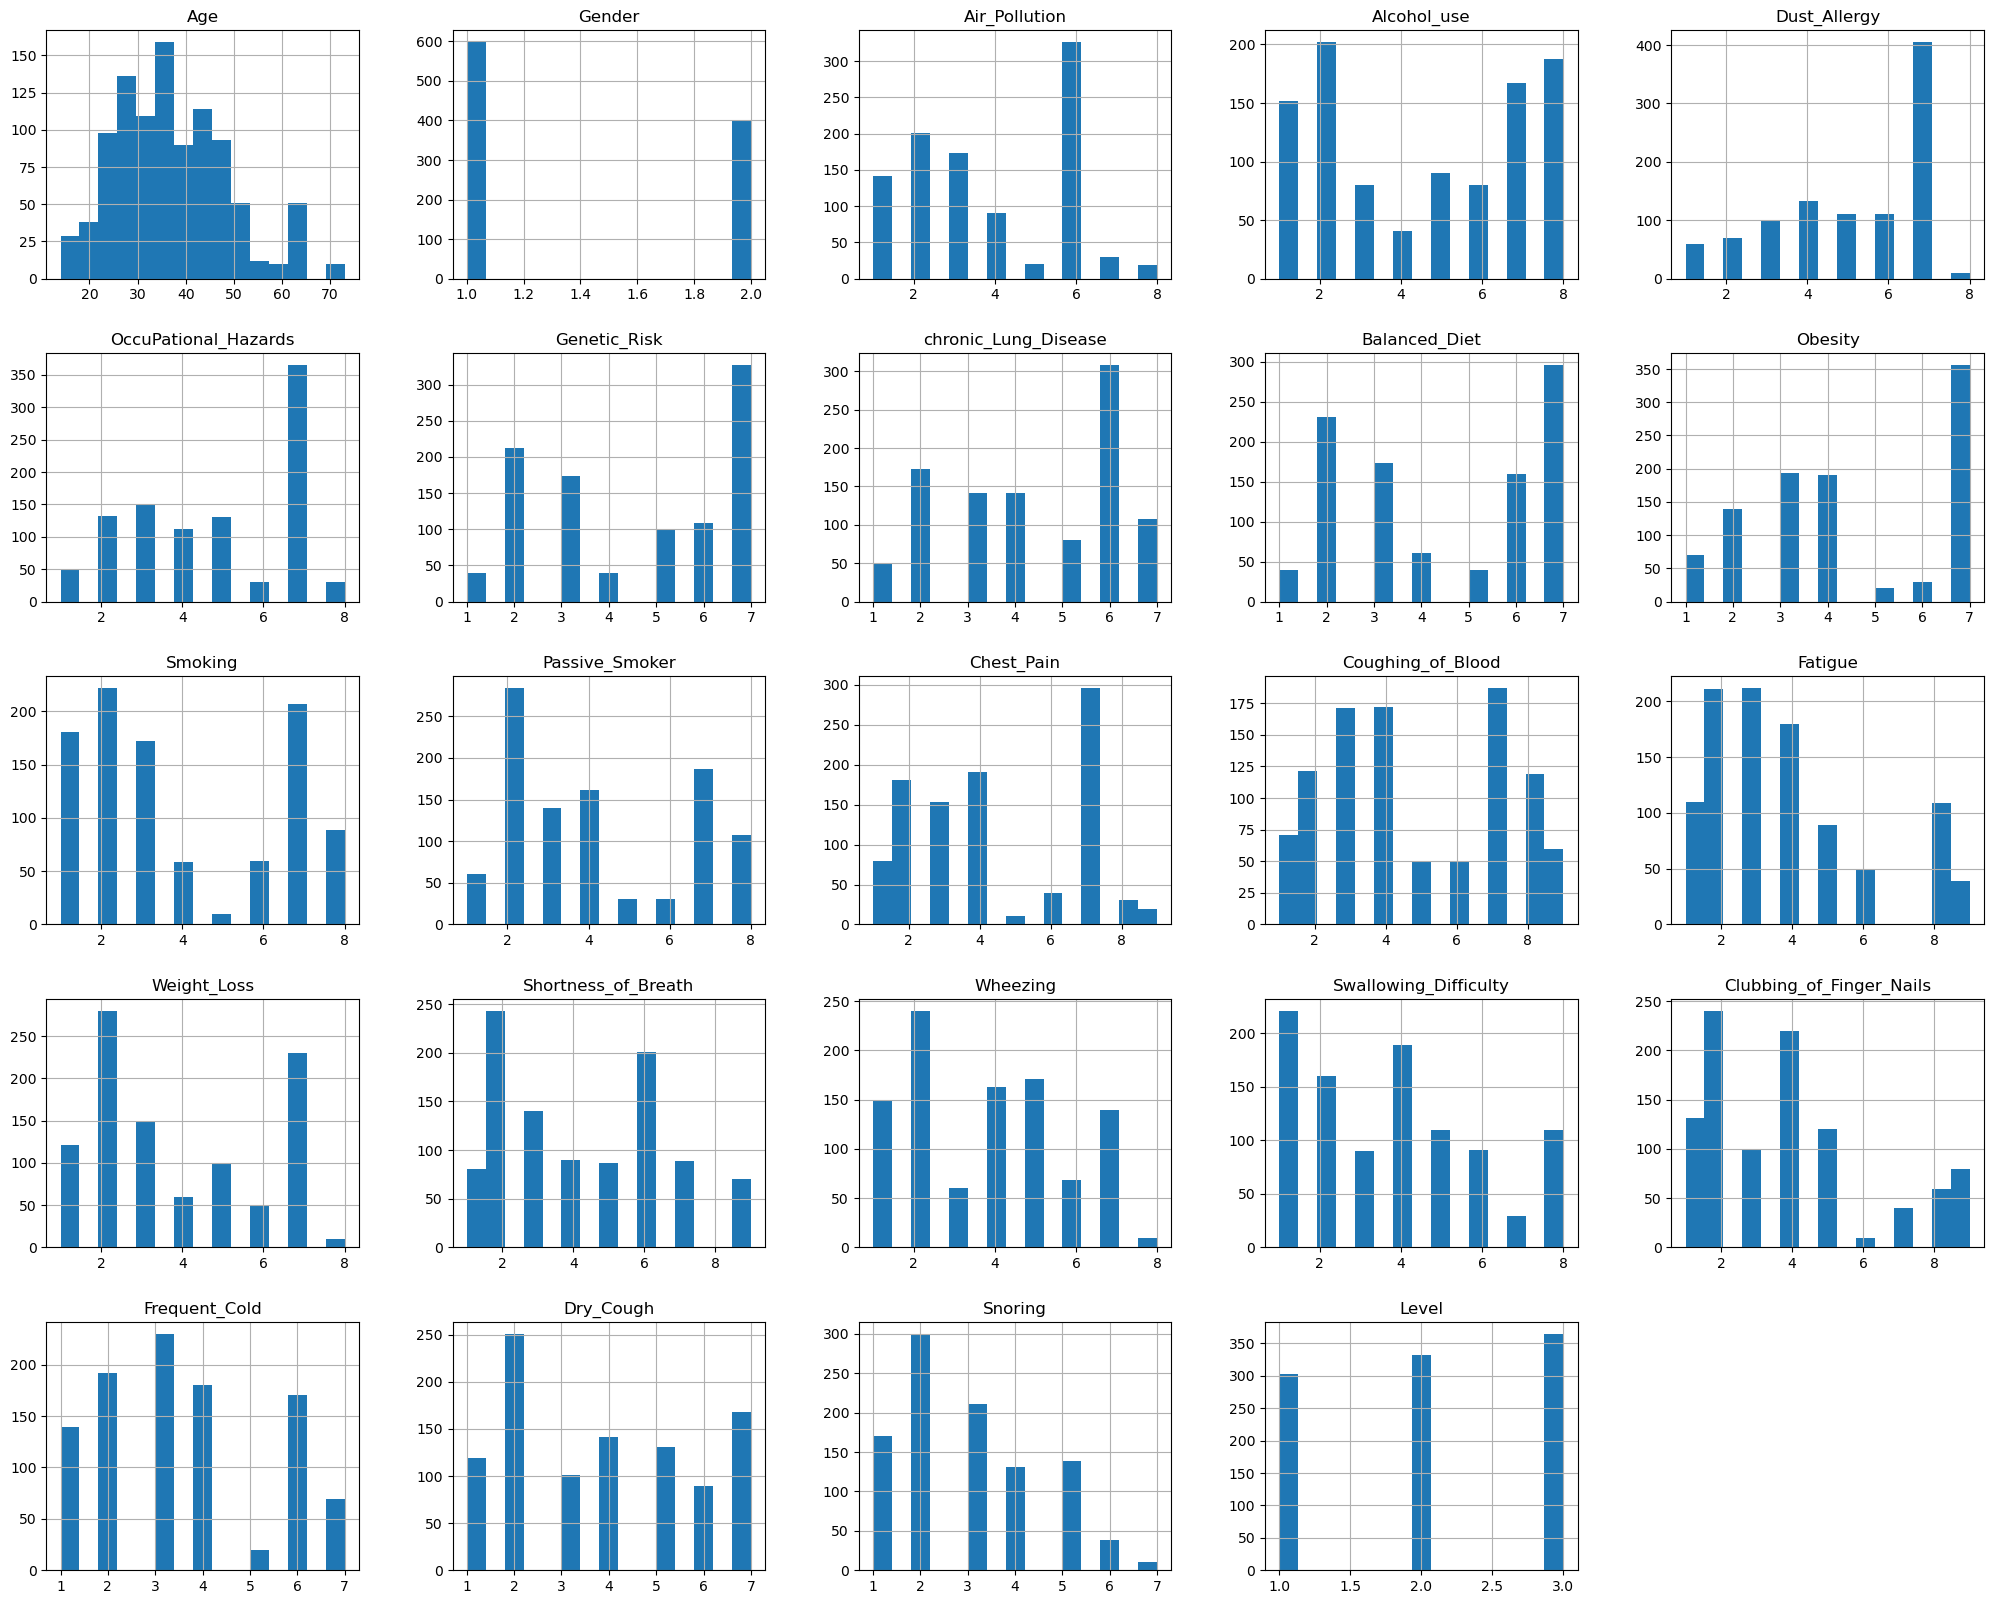

In [18]:
df.hist(figsize=(25,20),bins=15);

In [19]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,Age,Gender,Air_Pollution,Alcohol_use,Dust_Allergy,OccuPational_Hazards,Genetic_Risk,chronic_Lung_Disease,Balanced_Diet,Obesity,Smoking,Passive_Smoker,Chest_Pain,Coughing_of_Blood,Fatigue,Weight_Loss,Shortness_of_Breath,Wheezing,Swallowing_Difficulty,Clubbing_of_Finger_Nails,Frequent_Cold,Dry_Cough,Snoring,Level
Age,1.000,-0.202,0.099,0.152,0.035,0.062,0.073,0.129,0.005,0.034,0.075,0.005,0.013,0.053,0.095,0.107,0.035,-0.095,-0.106,0.039,-0.013,0.012,-0.005,0.060
Gender,-0.202,1.000,-0.247,-0.228,-0.204,-0.192,-0.223,-0.205,-0.100,-0.124,-0.207,-0.185,-0.218,-0.147,-0.116,-0.058,-0.046,-0.076,-0.058,-0.034,-0.001,-0.123,-0.182,-0.165
Air_Pollution,0.099,-0.247,1.000,0.747,0.638,0.609,0.705,0.627,0.525,0.601,0.482,0.607,0.586,0.608,0.212,0.258,0.270,0.055,-0.081,0.241,0.175,0.261,-0.021,0.636
Alcohol_use,0.152,-0.228,0.747,1.000,0.819,0.879,0.877,0.764,0.653,0.669,0.547,0.593,0.717,0.668,0.237,0.208,0.436,0.181,-0.114,0.415,0.181,0.211,0.123,0.719
Dust_Allergy,0.035,-0.204,0.638,0.819,1.000,0.836,0.788,0.620,0.647,0.701,0.359,0.560,0.640,0.625,0.332,0.322,0.519,0.305,0.031,0.346,0.219,0.300,0.053,0.714
OccuPational_Hazards,0.062,-0.192,0.609,0.879,0.836,1.000,0.893,0.858,0.692,0.722,0.498,0.555,0.776,0.646,0.268,0.176,0.366,0.179,-0.003,0.366,0.077,0.160,0.023,0.673
Genetic_Risk,0.073,-0.223,0.705,0.877,0.788,0.893,1.000,0.836,0.680,0.730,0.543,0.609,0.832,0.632,0.231,0.272,0.458,0.205,-0.063,0.358,0.087,0.194,-0.057,0.701
chronic_Lung_Disease,0.129,-0.205,0.627,0.764,0.620,0.858,0.836,1.000,0.623,0.602,0.579,0.573,0.783,0.603,0.248,0.104,0.182,0.057,0.007,0.298,0.029,0.114,0.043,0.610
Balanced_Diet,0.005,-0.100,0.525,0.653,0.647,0.692,0.680,0.623,1.000,0.707,0.645,0.725,0.798,0.745,0.401,-0.007,0.344,0.064,0.047,0.042,0.264,0.332,0.153,0.706
Obesity,0.034,-0.124,0.601,0.669,0.701,0.722,0.730,0.602,0.707,1.000,0.487,0.682,0.673,0.815,0.553,0.313,0.406,0.094,0.127,0.149,0.288,0.201,0.039,0.827


<Axes: >

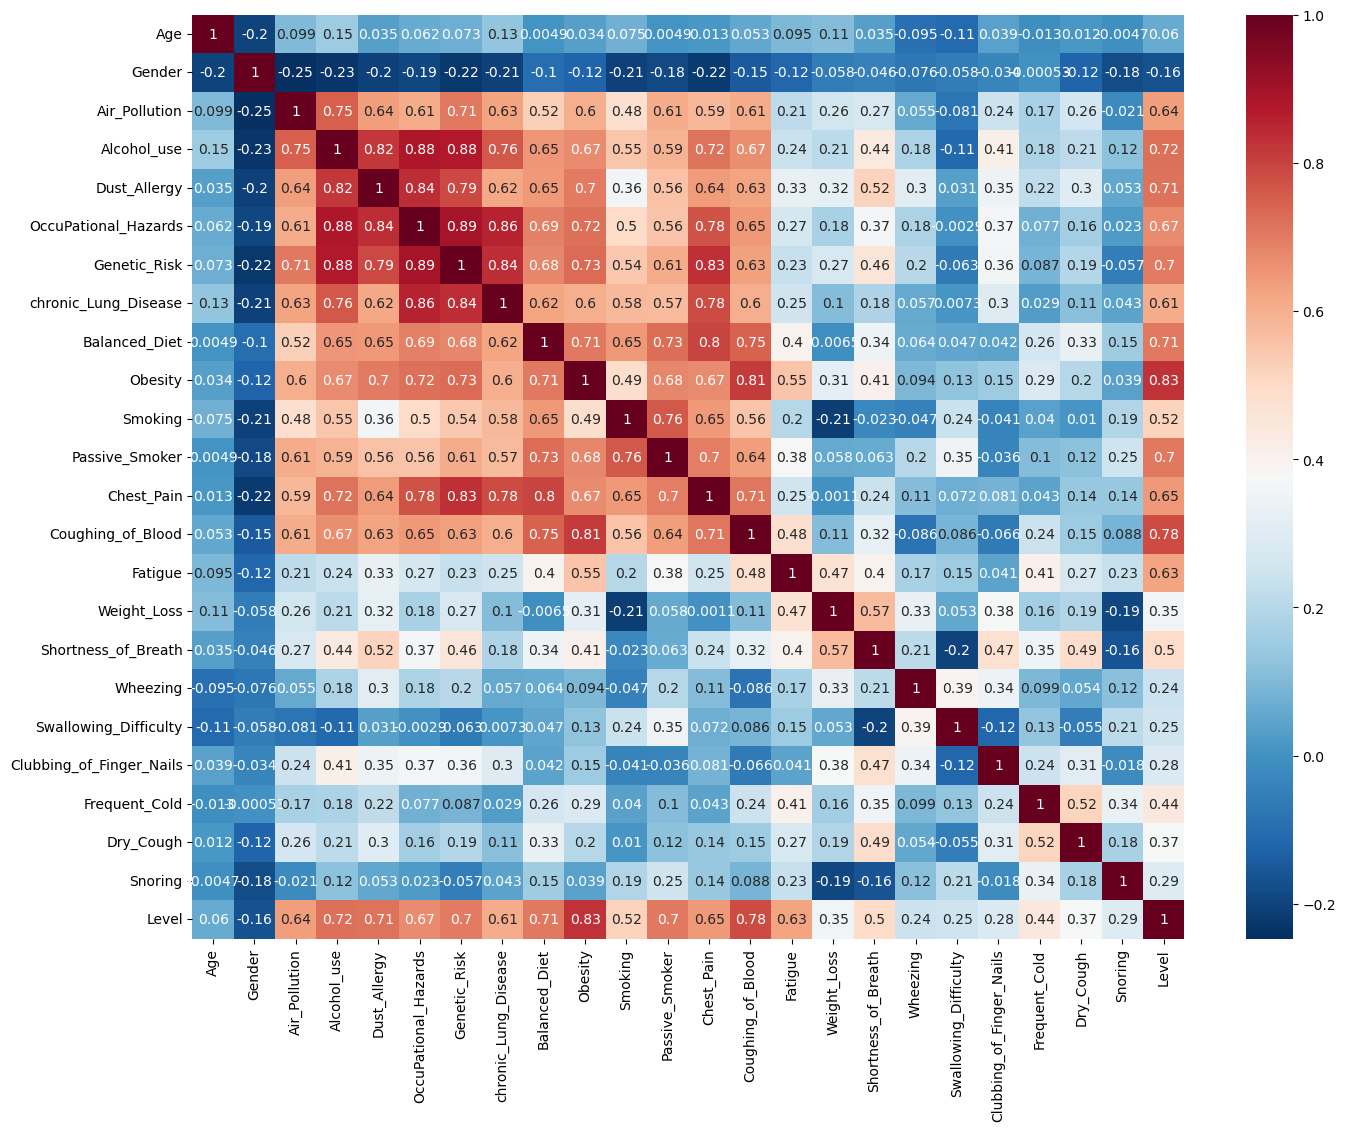

In [20]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True,fmt='.2g')

In [21]:
# Age and gender

dc=df[['Age','Gender','Level']]
dc['Gender'].replace({1:'Male',2:'Female'},inplace=True)
dc['Level'].replace({1:'Low',2:'Medium',3:'High'},inplace=True)
dc

,Age,Gender,Level
0,33,Male,Low
1,17,Male,Medium
2,35,Male,High
3,37,Male,High
4,46,Male,High
...,...,...,...
995,44,Male,High
996,37,Female,High
997,25,Female,High
998,18,Female,High


Text(0.5, 1.0, 'Gender wise risk Level')

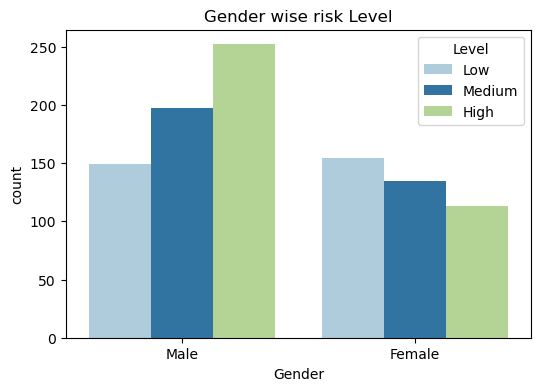

In [22]:
# Plot graph for Age/Gender/Level

plt.figure(figsize=(6,4))

palette = sns.color_palette('Paired')
palette

sns.countplot(data=dc,x='Gender',hue='Level',palette=palette);
plt.title('Gender wise risk Level')
# Change color of the bars

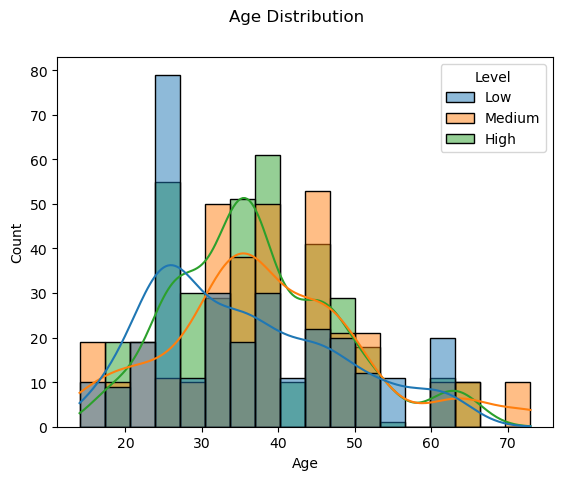

In [23]:
df['Level'].replace({1:'Low',2:'Medium',3:'High'},inplace=True)

sns.histplot(data =df,x='Age',hue='Level',kde=True)
plt.suptitle("Age Distribution");


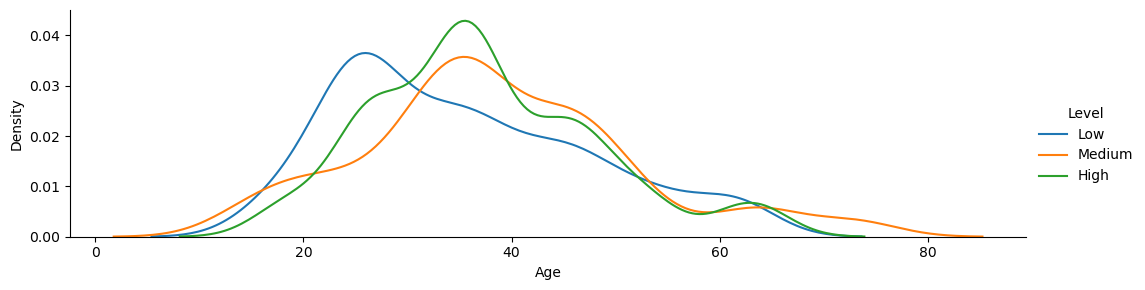

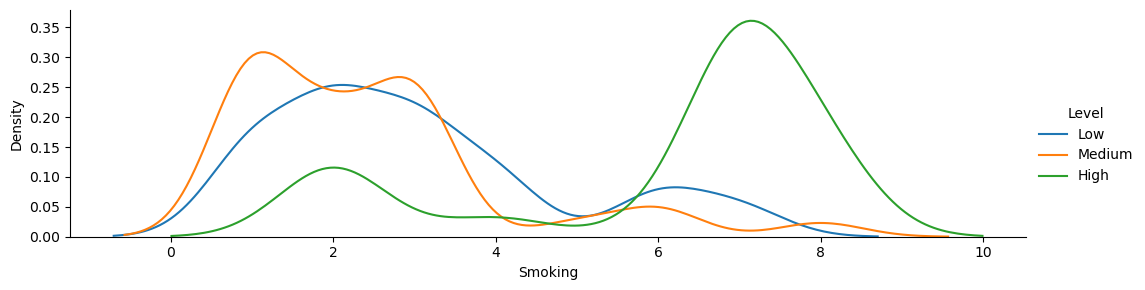

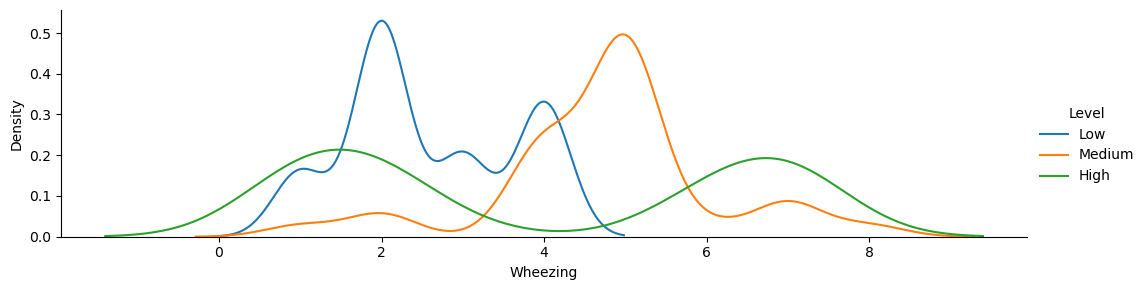

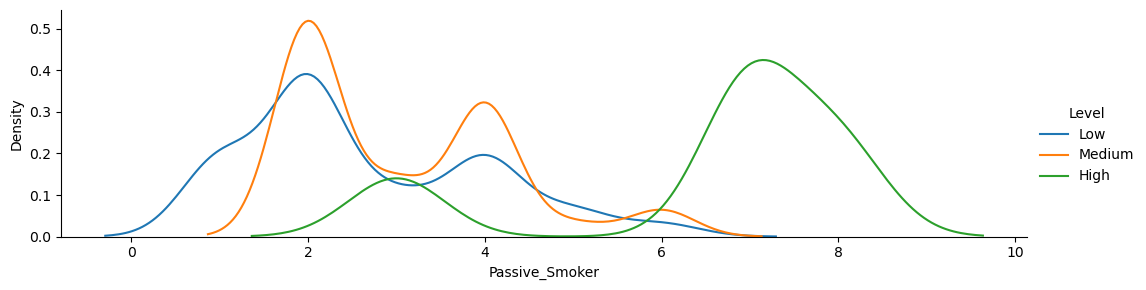

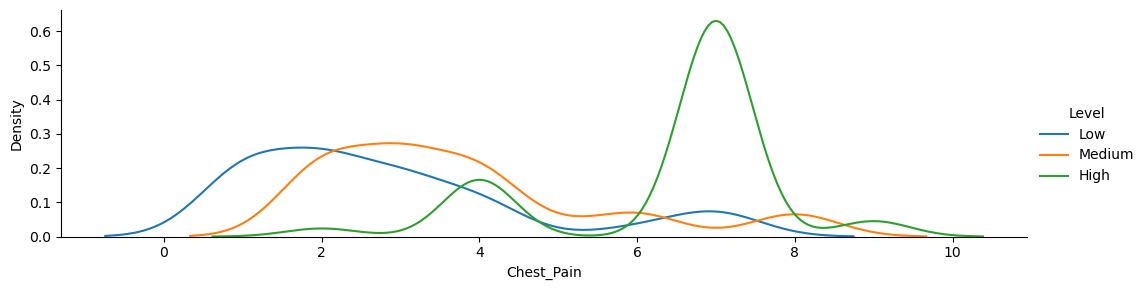

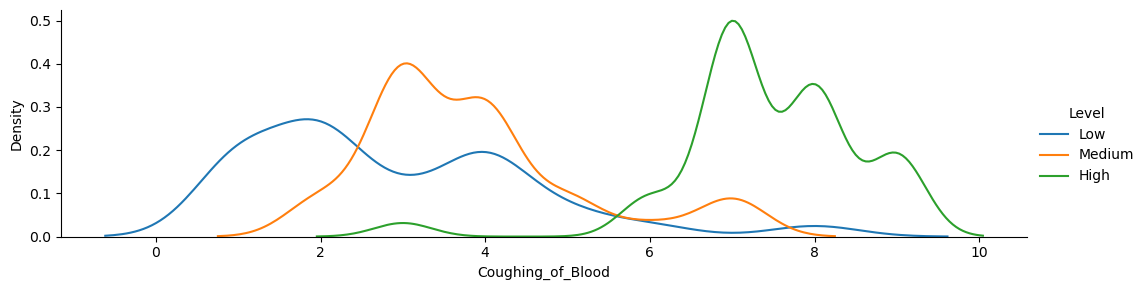

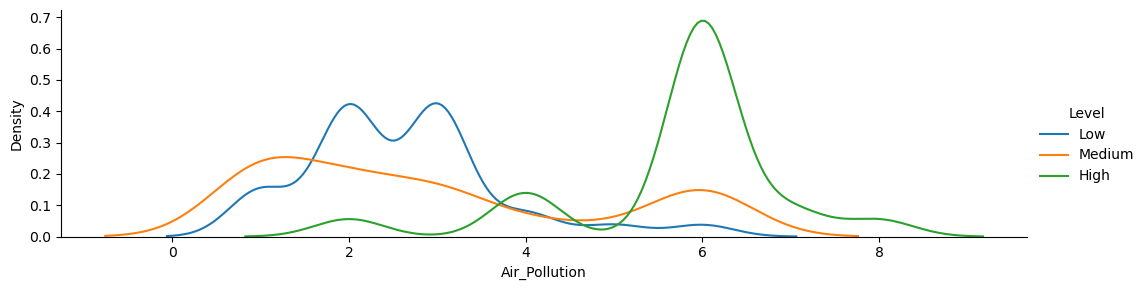

In [24]:
d=['Age','Smoking','Wheezing','Passive_Smoker','Chest_Pain','Coughing_of_Blood','Air_Pollution']

for i in d:
    a=sns.FacetGrid(df,hue='Level',aspect=3.5)
    a.map(sns.kdeplot,i)
    a.add_legend()
    plt.show()
    

In [25]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [26]:
classifier = RandomForestClassifier(n_estimators = 100,max_depth=1, random_state = 0,max_samples=0.20)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, max_samples=0.2, random_state=0)

In [27]:
Y_pred=classifier.predict(X_test)

In [28]:
c=accuracy_score(y_test,Y_pred)
print(f'The accuracy is {c*100:1.2f} %')


The accuracy is 80.33 %


In [29]:
d=recall_score(y_test,Y_pred,average='macro')
print(f'The recall_score is {c*100:1.2f} %')
print(classification_report(y_test,Y_pred))

The recall_score is 80.33 %
              precision    recall  f1-score   support

        High       0.88      1.00      0.94       108
         Low       0.71      0.88      0.78        99
      Medium       0.85      0.49      0.63        93

    accuracy                           0.80       300
   macro avg       0.81      0.79      0.78       300
weighted avg       0.81      0.80      0.79       300



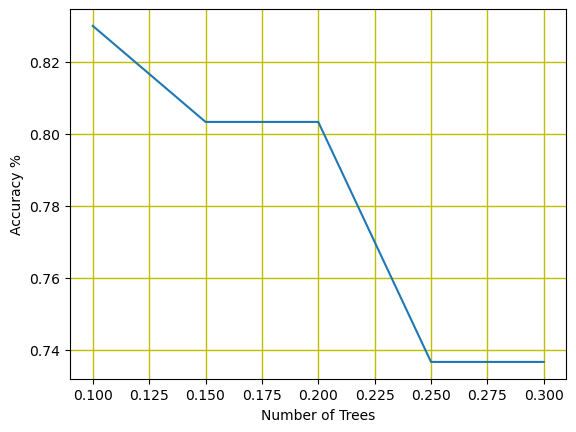

In [30]:
Acu=[]
for i in (0.10,0.15,0.2,0.25,0.30):
    classifier = RandomForestClassifier(n_estimators = 100,max_depth=1,max_samples=i,random_state = 0)
    classifier.fit(X_train, y_train)
    Y_pred=classifier.predict(X_test)
    c=accuracy_score(y_test,Y_pred)
    Acu.append(c)
    

plt.plot((0.10,0.15,0.2,0.25,0.30),Acu)
plt.grid(color='y', linestyle='-', linewidth=1)
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy %")
plt.show()
    
    
    

<Axes: >

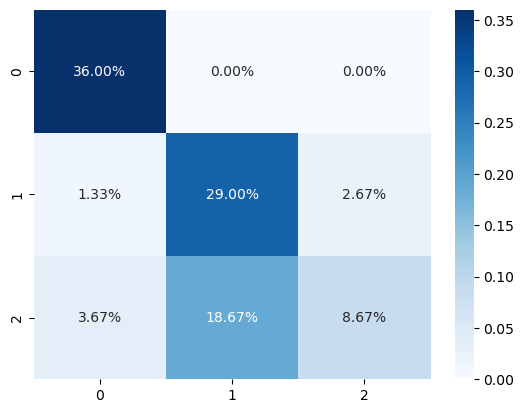

In [31]:
sns.heatmap(confusion_matrix(y_test,Y_pred)/np.sum(confusion_matrix(y_test,Y_pred)),annot=True,fmt='.2%', cmap='Blues')

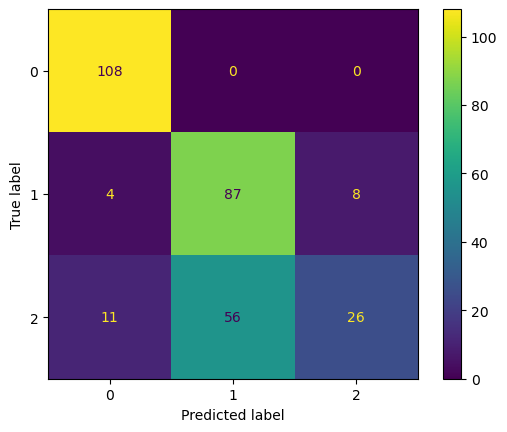

In [32]:
ConfusionMatrixDisplay(confusion_matrix(y_test,Y_pred)).plot()

In [33]:
# using cross validation the accuracy 

from sklearn.model_selection import cross_val_score
classifier = RandomForestClassifier(n_estimators =100,max_depth=1, random_state =0,max_samples=0.20)

accuracy=cross_val_score(estimator=classifier,X=X,y=Y,cv=10)
print(f"The mean accuracy is {np.mean(accuracy)*100}")


The mean accuracy is 76.7


In [34]:
param_grid={
    'n_estimators':[100,200,300,400],
    'criterion':["gini", "entropy"],
    'max_features':["sqrt", "auto"],
    'max_depth':[1,2],
    'max_samples':[0.10,0.15,0.2,0.25,0.30]
}


In [35]:
cv=GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 2],
                         'max_features': ['sqrt', 'auto'],
                         'max_samples': [0.1, 0.15, 0.2, 0.25, 0.3],
                         'n_estimators': [100, 200, 300, 400]})

In [36]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'sqrt',
 'max_samples': 0.1,
 'n_estimators': 400}

In [37]:
best=cv.best_estimator_
best

RandomForestClassifier(max_depth=2, max_samples=0.1, n_estimators=400)

The accuracy is 94.33 %
The recall_score is 94.32 %
              precision    recall  f1-score   support

        High       0.94      0.96      0.95       108
         Low       1.00      0.90      0.95        99
      Medium       0.90      0.97      0.93        93

    accuracy                           0.94       300
   macro avg       0.95      0.94      0.94       300
weighted avg       0.95      0.94      0.94       300



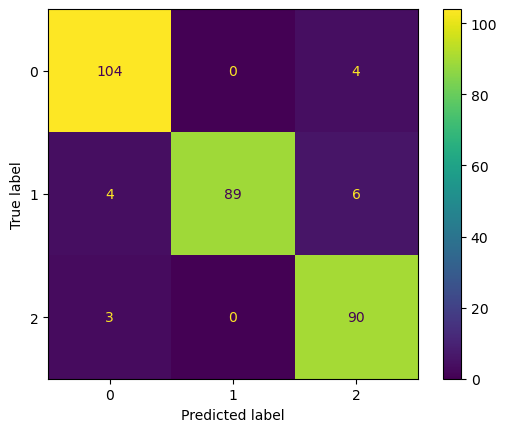

In [38]:
classifier = RandomForestClassifier(n_estimators = 400,criterion='gini',max_features='sqrt',max_depth=2,max_samples=0.1,random_state = 0)
classifier.fit(X_train, y_train)
Y_pred=classifier.predict(X_test)
c=accuracy_score(y_test,Y_pred)
print(f'The accuracy is {c*100:1.2f} %')

c=recall_score(y_test,Y_pred,average='macro')
print(f'The recall_score is {c*100:1.2f} %')
print(classification_report(y_test,Y_pred))


ConfusionMatrixDisplay(confusion_matrix(y_test,Y_pred)).plot()

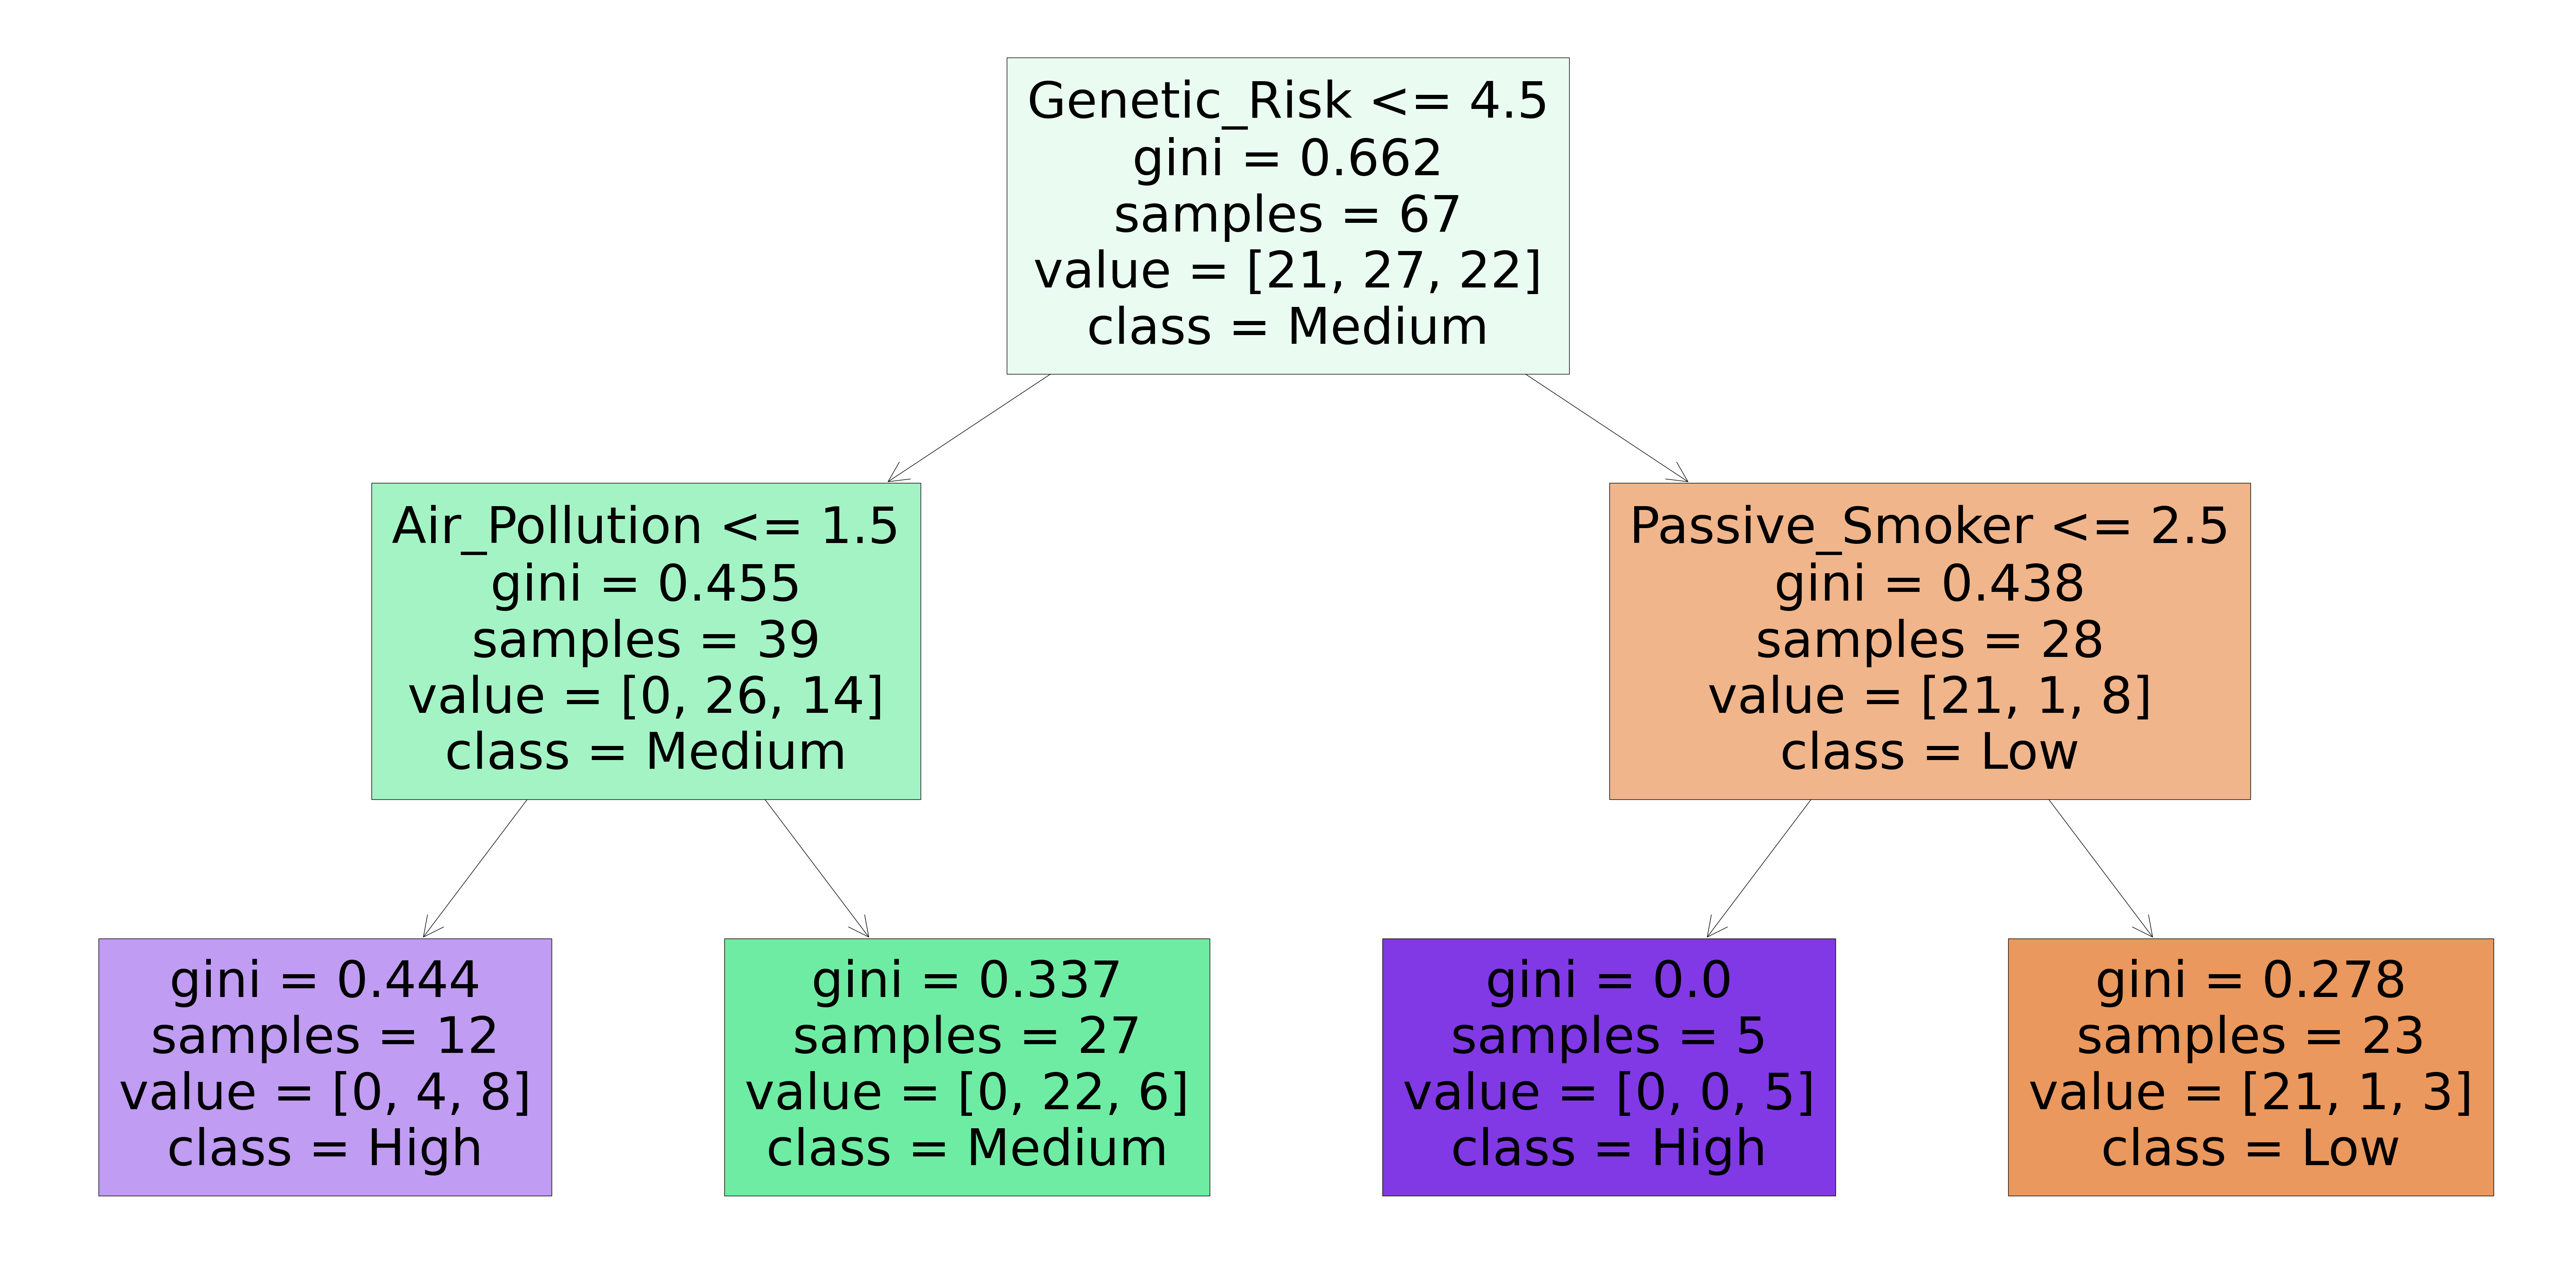

In [39]:
# cv.best_estimator_

from sklearn.tree import plot_tree
plt.figure(figsize=(80,40))
Y.replace({1:'Low',2:'Medium',3:'High'},inplace=True)
plot_tree(best.estimators_[38], feature_names = X.columns,filled=True,class_names=list(Y.unique()));

In [40]:
# importance=pd.DataFrame({'Name':X.columns,'Importance':classifier.feature_importances_})

# plt.figure(figsize=(8,6))

# sns.barplot(
#     data=importance.sort_values(by='Importance',ascending=False), x="Importance", y="Name",
#     capsize=.3, errcolor=".7",linewidth=3, edgecolor=".5");

In [41]:
# Work on ROC Curves

from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier   # Ass we are dealing with multiclass oneVsRest strategy is used

Y=df.iloc[:,-1]


Y.replace({'Low':1,'Medium':2,'High':3},inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 0)


RF=OneVsRestClassifier(RandomForestClassifier(n_estimators =300,criterion='gini',max_features='sqrt',max_depth=2 ,random_state = 0))
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)
y_proba=RF.predict_proba(X_test)



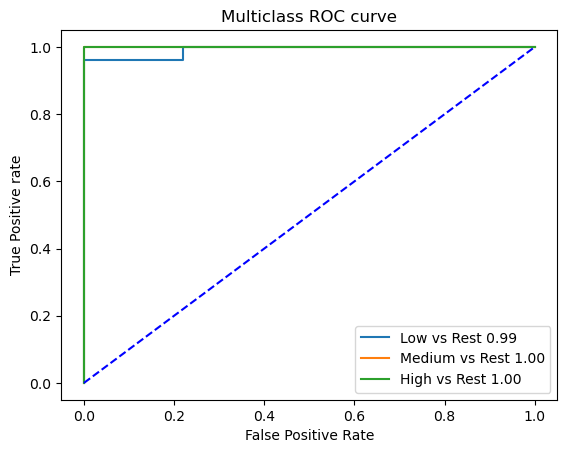

In [42]:
from sklearn.preprocessing import label_binarize

y_test_binarized=label_binarize(y_test,classes=np.unique(y_test))
classes=np.unique(y_test)

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = 3
Str=['Low','Medium','High']
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], y_proba[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], 
             label=f'{Str[i]} vs Rest {roc_auc[i]:1.2f}')

plt.plot([0,1],[0,1],'b--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()

In [43]:
# Dumping the model object

import pickle

pickle.dump(classifier,open('classifier.pkl','wb'))

In [44]:
# Reloading the model object

classifier=pickle.load(open('classifier.pkl','rb'))